### Bathymetry SVB - Domain for smoother bathymetry (1000x smoother)

Longer domain to the north and extended to the west to avoid flattening the bottom at the shelf north of Point Conception because it generates inernal waves at the artificial step.

In this bathymetry we apply the same filters as before but the deep filter passes 1000 times to really smooth out the shelf and slope.

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 5 is bounded by

* north: 35.3 N 
* south: 27.0 N
* west: -122.0 W
* east: -114.0 W

Other considerations
* Bottom depth flattened to -5000 m. 
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts from the measurement tracks.
* Deep filter applied 1000x

Grid
* Horizontal resolution: $\Delta$lon -0.0156 deg (~1.42 km S-1.55 km N) and $\Delta$lat 0.0136 (1.503 km N and S)
* nx=512, ny=612, nz=100, 

OPEN BOUNDARIES: North, West and South

In [24]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [25]:
nc_file = '../../data/gebco_SVB/gebco_2020_n36.0_s26.0_w-122.0_e-113.5.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2400,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

In [26]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [27]:
for ii,lati in zip(range(len(lat)),lat):
    print(ii,lati)

0 26.00208333333333
1 26.006249999999994
2 26.01041666666667
3 26.014583333333334
4 26.018749999999997
5 26.02291666666666
6 26.027083333333337
7 26.03125
8 26.035416666666663
9 26.039583333333326
10 26.043750000000003
11 26.047916666666666
12 26.05208333333333
13 26.05624999999999
14 26.06041666666667
15 26.06458333333333
16 26.068749999999994
17 26.07291666666667
18 26.077083333333334
19 26.081249999999997
20 26.08541666666666
21 26.089583333333337
22 26.09375
23 26.097916666666663
24 26.102083333333326
25 26.106250000000003
26 26.110416666666666
27 26.11458333333333
28 26.11874999999999
29 26.12291666666667
30 26.12708333333333
31 26.131249999999994
32 26.13541666666667
33 26.139583333333334
34 26.143749999999997
35 26.14791666666666
36 26.152083333333337
37 26.15625
38 26.160416666666663
39 26.164583333333326
40 26.168750000000003
41 26.172916666666666
42 26.17708333333333
43 26.18124999999999
44 26.18541666666667
45 26.18958333333333
46 26.193749999999994
47 26.19791666666667
48 2

1366 31.693749999999994
1367 31.69791666666667
1368 31.702083333333334
1369 31.706249999999997
1370 31.71041666666666
1371 31.714583333333337
1372 31.71875
1373 31.722916666666663
1374 31.727083333333326
1375 31.731250000000003
1376 31.735416666666666
1377 31.73958333333333
1378 31.74374999999999
1379 31.74791666666667
1380 31.75208333333333
1381 31.756249999999994
1382 31.76041666666667
1383 31.764583333333334
1384 31.768749999999997
1385 31.77291666666666
1386 31.777083333333337
1387 31.78125
1388 31.785416666666663
1389 31.789583333333326
1390 31.793750000000003
1391 31.797916666666666
1392 31.80208333333333
1393 31.80624999999999
1394 31.81041666666667
1395 31.81458333333333
1396 31.818749999999994
1397 31.82291666666667
1398 31.827083333333334
1399 31.831249999999997
1400 31.83541666666666
1401 31.839583333333337
1402 31.84375
1403 31.847916666666663
1404 31.852083333333326
1405 31.856250000000003
1406 31.860416666666666
1407 31.86458333333333
1408 31.86874999999999
1409 31.872916

In [28]:
## Set domain corners
lon1 = 0
lon2 = 1919
lat1 = 240
lat2 = 2232

## Flatten out bottom at 5000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -5000] = -5000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0
elev[lat2-1375:lat2-640, lon2-200:lon2+3] = 0
elev[lat2-760:lat2+3, lon2-430:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


<ipython-input-29-891b179c053e>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2],
<ipython-input-29-891b179c053e>:6: UserWarning: No contour levels were found within the data range.
  cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])


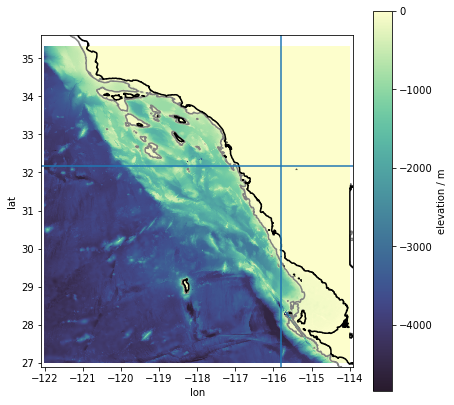

In [29]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2],
                   cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-750])
ax.axvline(lon[lon2-430])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-122.1,-113.9)
ax.set_ylim(26.9,35.6)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -5000 m (max depth found is 5083 m).  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [30]:
nx = 512
ny = 612

lon_vect = np.round(np.linspace(-122.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,35.3,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [31]:
bathy = f_interp(lon_vect,lat_vect)

<ipython-input-32-23efb1a3f1b0>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
<ipython-input-32-23efb1a3f1b0>:5: UserWarning: No contour levels were found within the data range.
  ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])


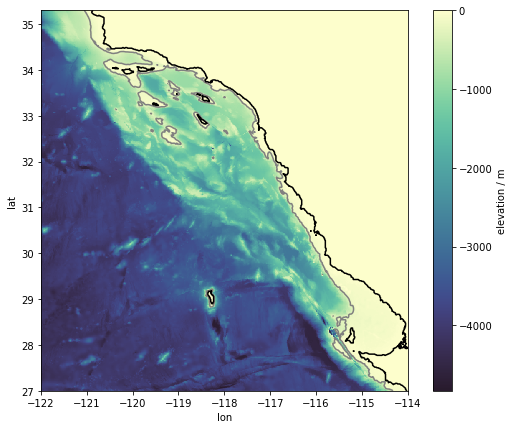

In [32]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [33]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [34]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


<ipython-input-35-49f080971bfa>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
<ipython-input-35-49f080971bfa>:5: UserWarning: No contour levels were found within the data range.
  ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
<ipython-input-35-49f080971bfa>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc1 = ax1.pcolormesh(lon_vect[1:], lat_v

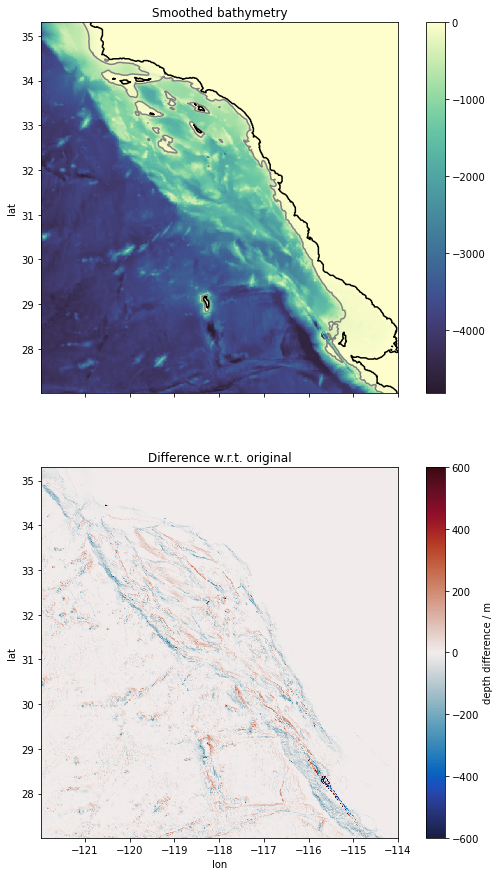

In [35]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [36]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

<ipython-input-37-63fbdb52af23>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], np.ma.masked_array(smooth_bathy, mask=mask), cmap=cmo.cm.deep)
<ipython-input-37-63fbdb52af23>:12: UserWarning: No contour levels were found within the data range.
  ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='w', levels=[0])


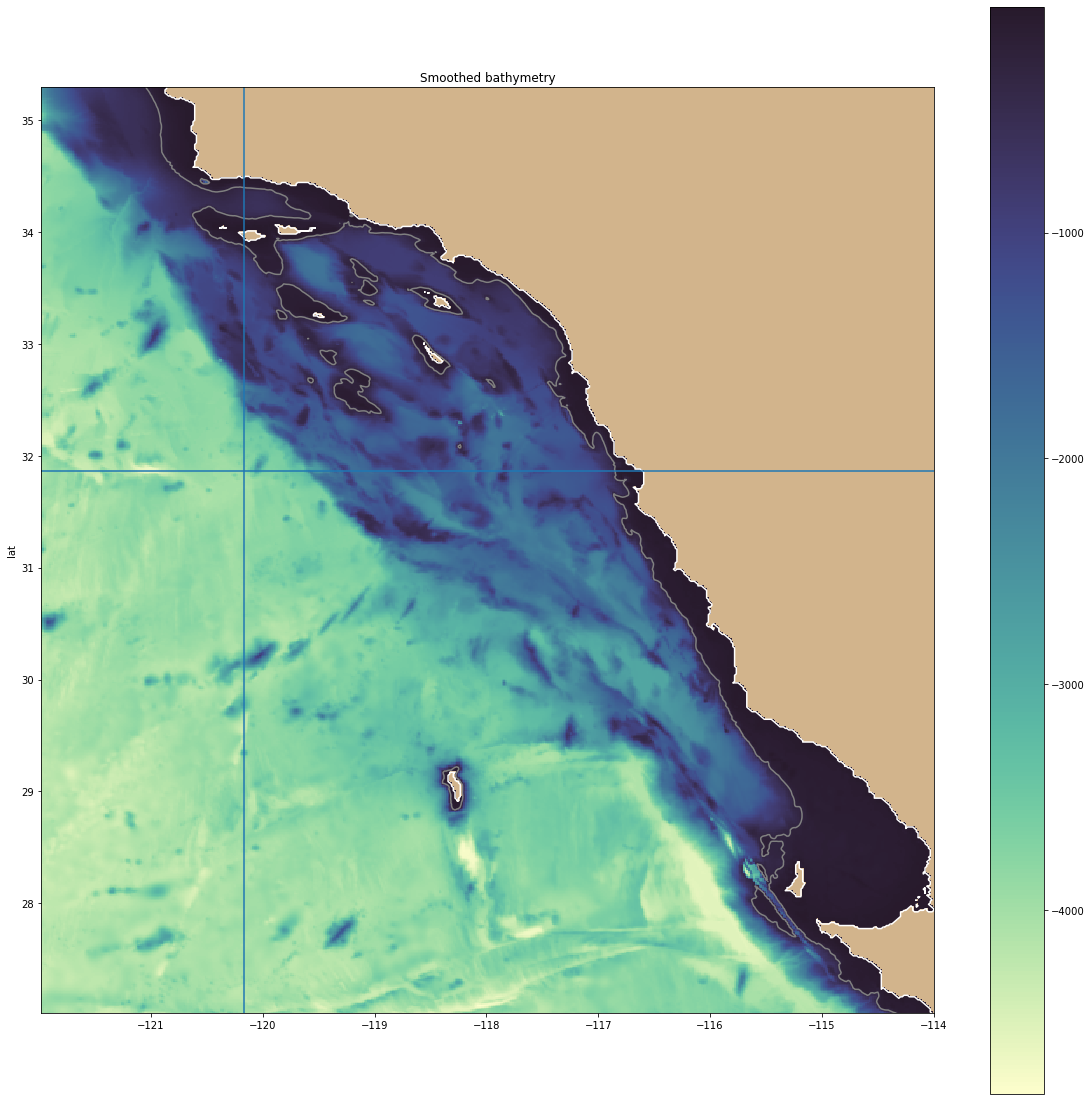

In [37]:
fig, (ax) = plt.subplots(1,1,figsize=(20,20), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], np.ma.masked_array(smooth_bathy, mask=mask), cmap=cmo.cm.deep)

cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='w', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


### SMOOTH 

In [38]:
def smoothgrid(h,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final):
    '''Function adapted from 
       https://rydsphd.wordpress.com/2011/09/20/smoothing-function-used-for-bathymetry/
       Smooth the topography to get a maximum r factor = rmax.
       
       h: np. array (bathymetry, positive)
       hmin: float, cutoff value of bathymetry (0 m)
       hmax: float, max depth at which to cut off bathymetry (5000 m)
       n_filter_deep_topo: Number of pass of a selective filter to reduce the isolated 
                           seamounts on the deep ocean.
       n_filter_final: Number of pass of a single hanning filter at the end of the
                       procedure to ensure that there is no 2DX noise in the topography.
       Further Information: http://www.brest.ird.fr/Roms_tools/

       Updated    Aug-2006 by Pierrick Penven'''

    # Chop the topography at min and max values
    h[h<hmin] = hmin
    h[h>hmax] = hmax
    
    # Step 1: Deep Ocean Filter (remove isolated seamounts)
    if n_filter_deep_topo >= 1:
    #  Build a smoothing coefficient that is a linear function
    #  of a smooth topography.
        coef=h.copy()
        for i in range(8):
            coef=hanning_smoother(coef)    # coef is a smoothed bathy
        coef=0.125*(coef/np.nanmax(coef))     # rescale the smoothed bathy
    
        for i in range(n_filter_deep_topo):
            h=hanning_smoother_coef2d(h,coef)     # smooth with avariable coef
            h[h<hmax_coast] = hmax_coast

    # Apply a selective filter on log(h) to reduce grad(h)/h.
    h = rotfilter(h,hmax_coast,rmax)

    # Smooth the topography again to prevent 2D noise
    if n_filter_final > 1:
        for i in range(n_filter_final):
            h=hanning_smoother(h)
            #h[h>hmax_coast]=hmax_coast
    h[h<hmin]=hmin
    return(h)

def hanning_smoother(h):
    M,L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2

    h[1:Mm,1:Lm]=0.125*(h[0:Mmm,1:Lm]+h[2:M,1:Lm]+
                        h[1:Mm,0:Lmm]+h[1:Mm,2:]+
                        4*h[1:Mm,1:Lm])
    h[0,:]=h[1,:]
    h[M-1,:]=h[Mm-1,:]
    h[:,0]=h[:,1]
    h[:,L-1]=h[:,Lm-1]
    return(h)

def hanning_smoother_coef2d(h,coef):
    M,L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2
    h[1:Mm,1:Lm]=(coef[1:Mm,1:Lm]*(h[0:Mmm,1:Lm]+h[2:M,1:Lm]+
                                  h[1:Mm,0:Lmm]+h[1:Mm,2:L])+
                  (np.ones(np.shape(coef[1:Mm,1:Lm]))-4.*coef[1:Mm,1:Lm])*h[1:Mm,1:Lm])

    h[0,:]=h[1,:]
    h[M-1,:]=h[Mm-1,:]
    h[:,0]=h[:,1]
    h[:,L-1]=h[:,Lm-1]
    return(h)

def rfact(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2
    rx=abs(h[0:M,1:L]-h[0:M,0:Lm])/(h[0:M,1:L]+h[0:M,0:Lm])
    ry=abs(h[1:M,0:L]-h[0:Mm,0:L])/(h[1:M,0:L]+h[0:Mm,0:L])
    return(rx,ry)

def FX(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2

    fx[1:Mm,:]=((h[1:Mm,1:L]-h[1:Mm,0:Lm])*5/6 +
                (h[0:Mmm,1:L]-h[0:Mmm,0:Lm]+h[2:M,1:L]-h[2:M,0:Lm])/12)

    fx[0,:]=fx[1,:]
    fx[M-1,:]=fx[Mm-1,:]
    return(fx)

def FY(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2

    fy[:,1:Lm]=((h[1:M,1:Lm]-h[0:Mm,1:Lm])*5/6 +
                (h[1:M,0:Lmm]-h[0:Mm,0:Lmm]+h[1:M,2:L]-h[1:Mm,2:L])/12)
      
    fy[:,0]=fy[:,1]
    fy[:,L-1]=fy[:,Lm-1]

    return(fy)

def rotfilter(h,hmax_coast,rmax):
    '''Apply a selective filter on log(h) to reduce grad(h)/h.'''
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2
    cff=0.8
    nu=3/16
    rx, ry = rfact(h)
    r = np.max(np.array(np.max(rx),np.max(ry)))
    h=np.log(h)
    #hmax_coast = np.log(hmax_coast)
    i=0
    while r>rmax:
        i=i+1
        cx = float(rx>cff*rmax)
        cx = hanning_smoother(cx)
        cy = float(ry>cff*rmax)
        cy = hanning_smoother(cy)
        fx = cx*FX(h)
        fy = cy*FY(h)
        h[1:Mm,1:Lm]=(h[1:Mm,1:Lm]+
                      nu*((fx[1:Mm,1:Lm]-fx[1:Mm,0:Lmm])+
                          (fy[1:Mm,1:Lm]-fy[0:Mmm,1:Lm])))
        h[0,:] = h[1,:]
        h[M-1,:] = h[M-1,:]
        h[:,0] = h[:,1]
        h[:,L-1] = h[:,Lm-1]
        #h[h>hmax_coast] = hmax_coast
        rx, ry = rfact(np.exp(h))
        r = np.max(np.array(np.max(rx),np.max(ry)))
    h = np.exp(h)
    return(h)



In [39]:
# deep filter = 10
hmin = 0
hmax = 5000
hmax_coast = 0
rmax = 0.5
n_filter_deep_topo = 10
n_filter_final = 1
h2 = -smooth_bathy.copy()
HH = smoothgrid(h2,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final)

<ipython-input-38-35722403785d>:83: RuntimeWarning: invalid value encountered in true_divide
  rx=abs(h[0:M,1:L]-h[0:M,0:Lm])/(h[0:M,1:L]+h[0:M,0:Lm])
<ipython-input-38-35722403785d>:84: RuntimeWarning: invalid value encountered in true_divide
  ry=abs(h[1:M,0:L]-h[0:Mm,0:L])/(h[1:M,0:L]+h[0:Mm,0:L])
<ipython-input-38-35722403785d>:127: RuntimeWarning: divide by zero encountered in log
  h=np.log(h)


In [40]:
# deep filter = 1000

hmin = 0
hmax = 5000
hmax_coast = 0
rmax = 0.5
n_filter_deep_topo = 1000
n_filter_final = 1
h3 = -smooth_bathy.copy()
HH2 = smoothgrid(h3,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final)

<ipython-input-38-35722403785d>:83: RuntimeWarning: invalid value encountered in true_divide
  rx=abs(h[0:M,1:L]-h[0:M,0:Lm])/(h[0:M,1:L]+h[0:M,0:Lm])
<ipython-input-38-35722403785d>:84: RuntimeWarning: invalid value encountered in true_divide
  ry=abs(h[1:M,0:L]-h[0:Mm,0:L])/(h[1:M,0:L]+h[0:Mm,0:L])
<ipython-input-38-35722403785d>:127: RuntimeWarning: divide by zero encountered in log
  h=np.log(h)


<ipython-input-41-a0002f0ca167>:12: UserWarning: No contour levels were found within the data range.
  axx.contour(-smooth_bathy, levels=[0], colors='r')
<ipython-input-41-a0002f0ca167>:13: UserWarning: No contour levels were found within the data range.
  axx.contour(HH, levels=[0], colors='k')
<ipython-input-41-a0002f0ca167>:19: UserWarning: No contour levels were found within the data range.
  ax3.contour(-smooth_bathy, levels=[0], colors='r')
<ipython-input-41-a0002f0ca167>:20: UserWarning: No contour levels were found within the data range.
  ax3.contour(HH2, levels=[0], colors='k')


Text(0.5, 1.0, 'smoothed x 1000 - original')

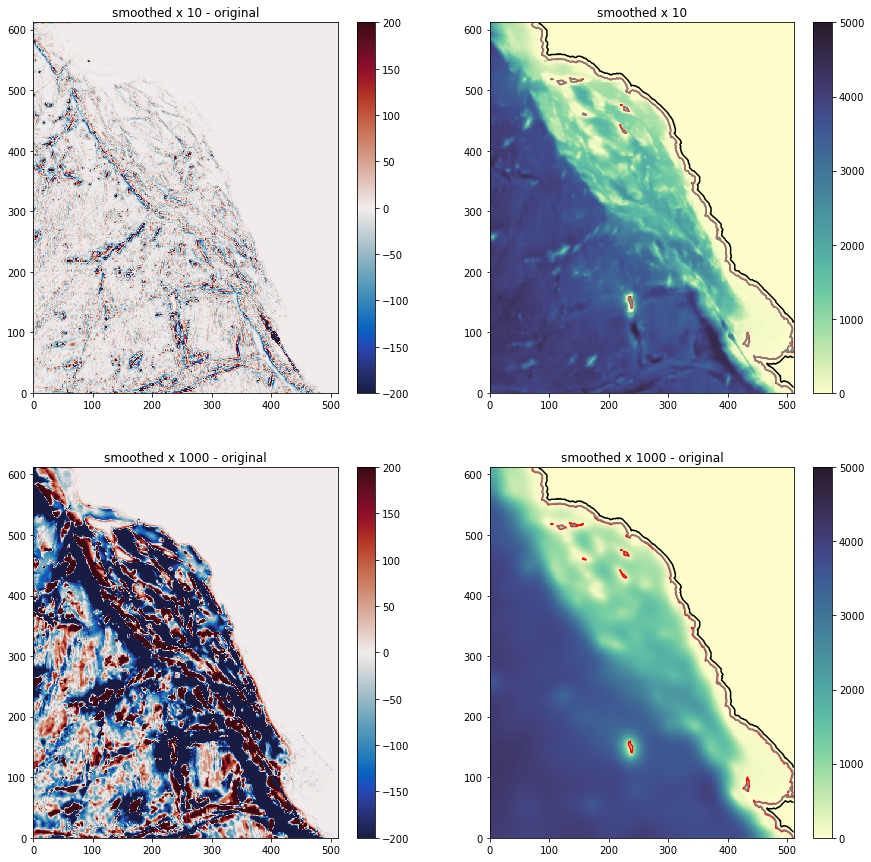

In [41]:
fig,((ax,axx),(ax2,ax3)) = plt.subplots(2,2, figsize=(15,15))

pc = ax.pcolormesh(HH-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-200, vmax=200)
plt.colorbar(pc, ax=ax)
ax.set_title('smoothed x 10 - original')

pc2 = ax2.pcolormesh(HH2-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-200, vmax=200)
plt.colorbar(pc2,ax=ax2)
ax2.set_title('smoothed x 1000 - original')

pcx = axx.pcolormesh(HH, cmap=cmo.cm.deep, vmin=0, vmax=5000)
axx.contour(-smooth_bathy, levels=[0], colors='r')
axx.contour(HH, levels=[0], colors='k')
axx.contour(HH, levels=[0.1], colors='0.5')
plt.colorbar(pcx,ax=axx)
axx.set_title('smoothed x 10')

pc3 = ax3.pcolormesh(HH2, cmap=cmo.cm.deep, vmin=0, vmax=5000)
ax3.contour(-smooth_bathy, levels=[0], colors='r')
ax3.contour(HH2, levels=[0], colors='k')
ax3.contour(HH2, levels=[0.1], colors='0.5')
plt.colorbar(pc3,ax=ax3)
ax3.set_title('smoothed x 1000 - original')

In [42]:
HH_fix = HH.copy()
HH_fix[HH_fix<0.1] = 0

HH2_fix = HH2.copy()
HH2_fix[HH2_fix<0.1] = 0

<ipython-input-43-dd0a9840eaac>:5: UserWarning: No contour levels were found within the data range.
  ax.contour(-smooth_bathy, levels=[0], colors='k')
<ipython-input-43-dd0a9840eaac>:10: UserWarning: No contour levels were found within the data range.
  ax2.contour(-smooth_bathy, levels=[0], colors='k')
<ipython-input-43-dd0a9840eaac>:14: UserWarning: No contour levels were found within the data range.
  axx.contour(-smooth_bathy, levels=[0], colors='r')
<ipython-input-43-dd0a9840eaac>:15: UserWarning: No contour levels were found within the data range.
  axx.contour(HH_fix, levels=[0], colors='k')
<ipython-input-43-dd0a9840eaac>:21: UserWarning: No contour levels were found within the data range.
  ax3.contour(-smooth_bathy, levels=[0], colors='r')
<ipython-input-43-dd0a9840eaac>:22: UserWarning: No contour levels were found within the data range.
  ax3.contour(HH2_fix, levels=[0], colors='k')


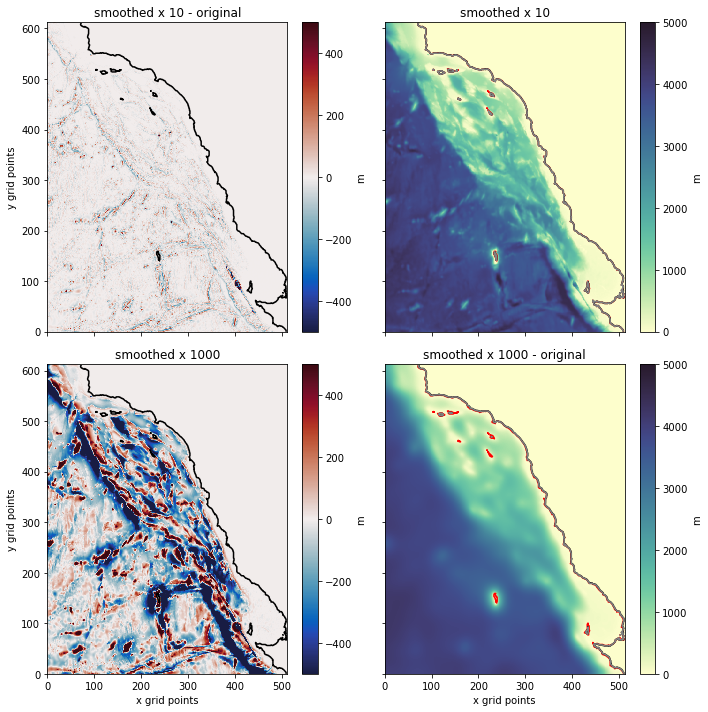

In [43]:
fig,((ax,axx),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

pc = ax.pcolormesh(HH_fix-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-500, vmax=500)
plt.colorbar(pc, ax=ax, label='m')
ax.contour(-smooth_bathy, levels=[0], colors='k')
ax.set_title('smoothed x 10 - original')

pc2 = ax2.pcolormesh(HH2_fix-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-500, vmax=500)
plt.colorbar(pc2,ax=ax2, label='m')
ax2.contour(-smooth_bathy, levels=[0], colors='k')
ax2.set_title('smoothed x 1000')

pcx = axx.pcolormesh(HH_fix, cmap=cmo.cm.deep, vmin=0, vmax=5000)
axx.contour(-smooth_bathy, levels=[0], colors='r')
axx.contour(HH_fix, levels=[0], colors='k')
axx.contour(HH_fix, levels=[0.1], colors='0.5')
plt.colorbar(pcx,ax=axx, label='m')
axx.set_title('smoothed x 10')

pc3 = ax3.pcolormesh(HH2_fix, cmap=cmo.cm.deep, vmin=0, vmax=5000)
ax3.contour(-smooth_bathy, levels=[0], colors='r')
ax3.contour(HH2_fix, levels=[0], colors='k')
ax3.contour(HH2_fix, levels=[0.1], colors='0.5')
plt.colorbar(pc3,ax=ax3, label='m')
ax3.set_title('smoothed x 1000 - original')
ax3.set_xlabel('x grid points')
ax2.set_xlabel('x grid points')
ax2.set_ylabel('y grid points')
ax.set_ylabel('y grid points')
plt.tight_layout()

### Flatten topo at open boundaries

In [44]:
for ii in range(15):
    HH2_fix[:,ii] = HH2_fix[:,15]

for ii in range(15):
    HH2_fix[ii,:] = HH2_fix[15,:]

<ipython-input-56-1264683c19bb>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_smooth, cmap=cmo.cm.deep)
<ipython-input-56-1264683c19bb>:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(lon_vect[1:],lat_vect[1:], -HH2_fix, colors='k', linewidth=1, levels=[-0.01])


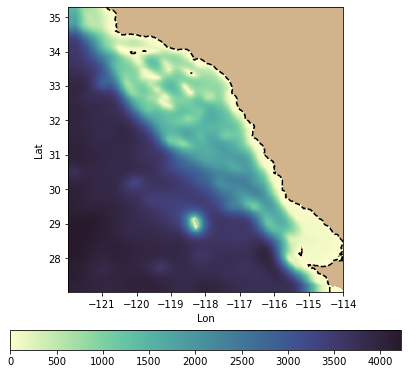

In [56]:
depths_smooth = np.ma.masked_array(HH2_fix, mask=mask)

# Plot to check
fig, (ax) = plt.subplots(1,1,figsize=(7,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_smooth, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -HH2_fix, colors='k', linewidth=1, levels=[-0.01])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax.set_aspect(1)

### Binary file

In [46]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [47]:
print(f" dy={dy[1]}, dx={dx[1]}")

 dy=0.013560000000001793, dx=0.015630000000001587


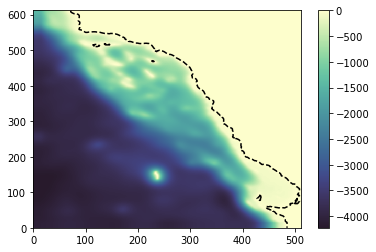

In [52]:
bathy_fname = '512x612/domain5_512x612_SVB_smooth1000_bat.bin'
dx_fname = '512x612/domain5_512x612_smooth1000_dx.bin'
dy_fname = '512x612/domain5_512x612_smooth1000_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd = -HH2_fix
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.contour(dd, levels=[-1,0], colors='k')
plt.show()

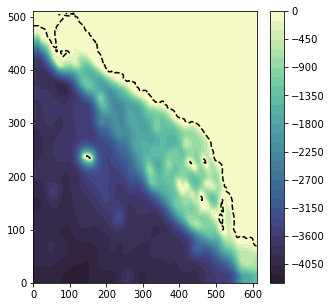

In [53]:
# Check it is read correctly
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
plt.colorbar(pc,ax=ax)
ax.contour(bF, levels=[-20,0], colors='k')

In [55]:
np.nanmax(-HH2_fix)

-0.0